Plot gradient fields and Jacobians that were generated by lya_fields.py.

In [13]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load in data

In [5]:
# dimensions of each tf-derived field
shape = [1, 1, 1024]
# string representing the subsection's dimensions, e.g. '4x4x4'
dims_str = str(shape[0]) + 'x' + str(shape[1]) + 'x' + str(shape[2])

device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    dims_str += 'gpu'

# the fields computed by lya_fields.py
tf_path = "results/tf_fields" + dims_str + ".h5"

h5_tf = h5py.File(tf_path,'r')

#h5_tf.keys() # ['n_gradients', 'nhi', 'tau_jacobians', 'tau_real', 'tau_red']

In [6]:
#dn_dr = h5_tf['n_gradients']['dn_dr']
#dn_dt = h5_tf['n_gradients']['dn_dt']

dtreal_dr_j = tf.squeeze(h5_tf['tau_jacobians']['dtreal_drho'])
dtred_dr_j = tf.squeeze(h5_tf['tau_jacobians']['dtred_drho'])
dtreal_dt_j = tf.squeeze(h5_tf['tau_jacobians']['dtreal_dt'])
dtred_dt_j = tf.squeeze(h5_tf['tau_jacobians']['dtred_dt'])

h5_tf.close()

# Gradients of $n$

In [ ]:
# ...

# Jacobians of $\tau$

Using subplots with imshow: https://stackoverflow.com/questions/18266642/multiple-imshow-subplots-each-with-colorbar

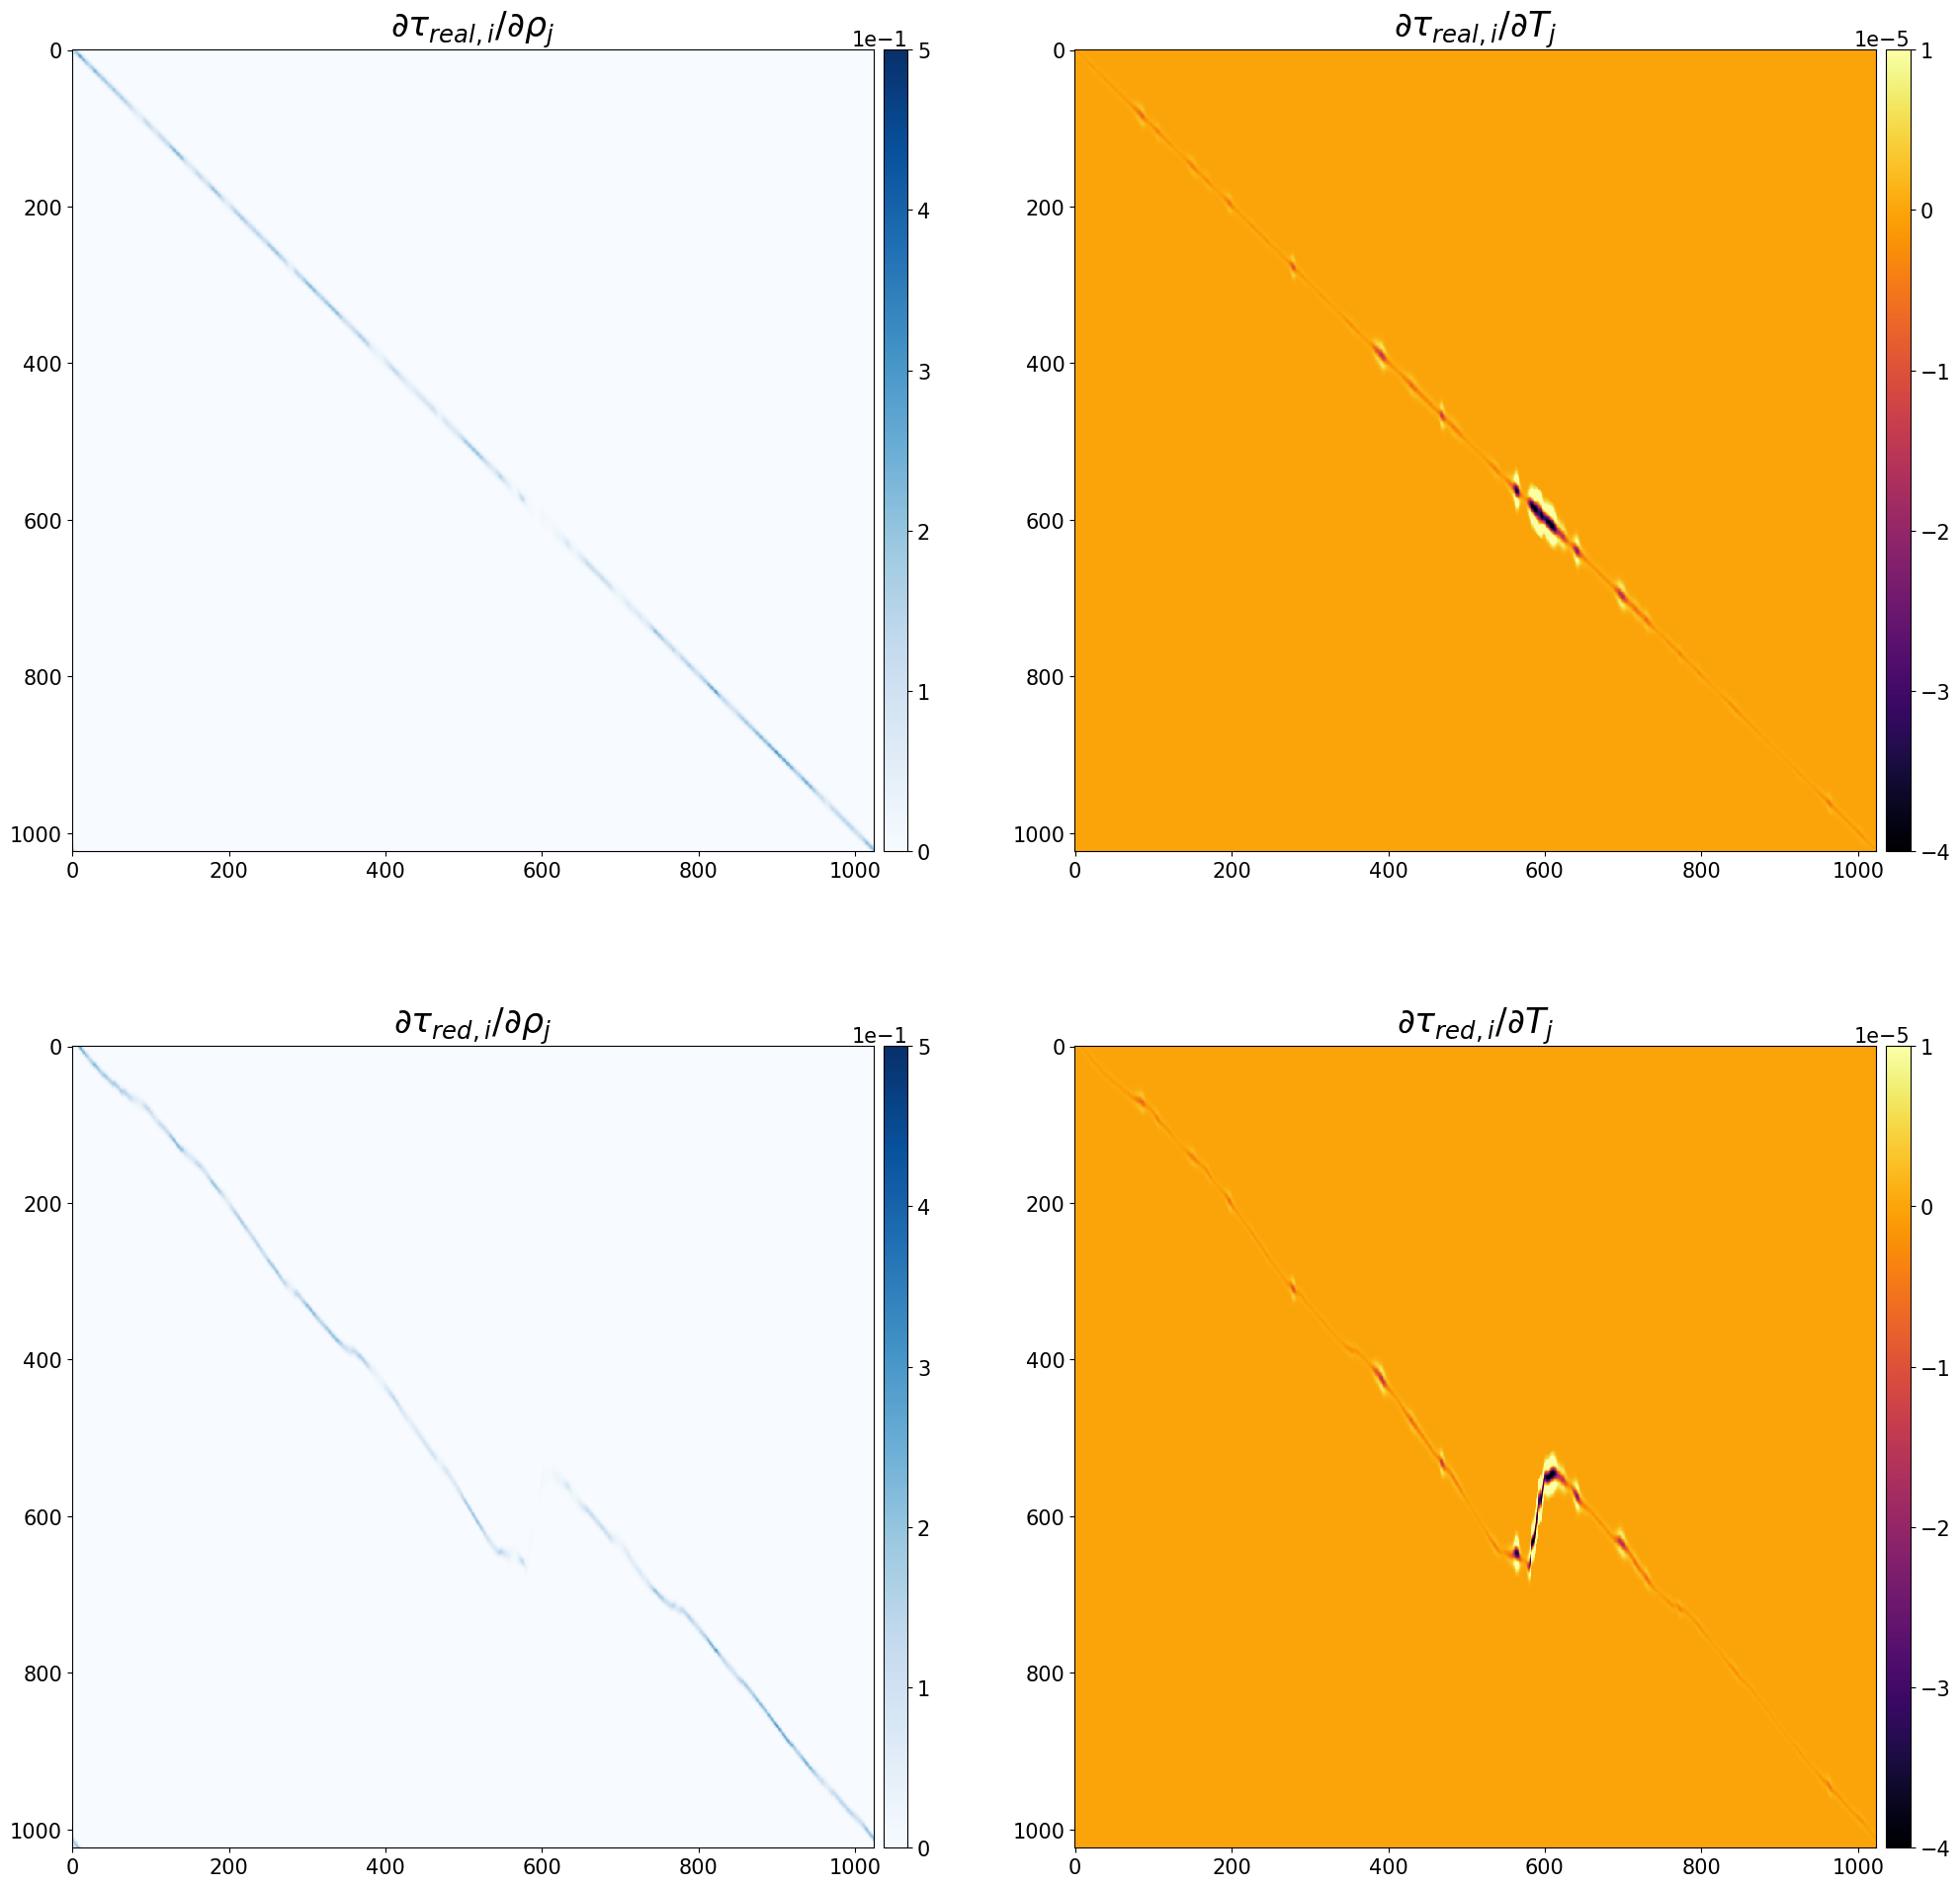

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(24, 24))

plt.rcParams.update({'font.size':15}) # set global font size
cbar_size = "3%"
cbar_pad = 0.1
title_fontsize = 25

vmin_r = 0
vmax_r = 0.5
vmin_t = -4e-5
vmax_t = 1e-5

ax[0,0].set_title(r'$\partial \tau_{real, i} / \partial \rho_j$', fontsize=title_fontsize)
im1 = ax[0,0].imshow(dtreal_dr_j[:,:], cmap='Blues', vmin=vmin_r, vmax=vmax_r)
# Create divider for existing axes instance
divider1 = make_axes_locatable(ax[0,0])
# Append axes to the right of ax1, with some percent width of ax1
cax1 = divider1.append_axes("right", size=cbar_size, pad=cbar_pad)
cbar1 = plt.colorbar(im1, cax=cax1)
cbar1.formatter.set_powerlimits((0, 0))

ax[1,0].set_title(r'$\partial \tau_{red, i} / \partial \rho_j$', fontsize=title_fontsize)
im2 = ax[1,0].imshow(dtred_dr_j[:,:], cmap='Blues', vmin=vmin_r, vmax=vmax_r)
divider2 = make_axes_locatable(ax[1,0])
cax2 = divider2.append_axes("right", size=cbar_size, pad=cbar_pad)
cbar2 = plt.colorbar(im2, cax=cax2)
cbar2.formatter.set_powerlimits((0, 0))

ax[0,1].set_title(r'$\partial \tau_{real, i} / \partial T_j$', fontsize=title_fontsize)
im3 = ax[0,1].imshow(dtreal_dt_j[:,:], cmap='inferno', vmin=vmin_t, vmax=vmax_t)
divider3 = make_axes_locatable(ax[0,1])
cax3 = divider3.append_axes("right", size=cbar_size, pad=cbar_pad)
cbar3 = plt.colorbar(im3, cax=cax3)
cbar3.formatter.set_powerlimits((0, 0))

ax[1,1].set_title(r'$\partial \tau_{red, i} / \partial T_j$', fontsize=title_fontsize)
im4 = ax[1,1].imshow(dtred_dt_j[:,:], cmap='inferno', vmin=vmin_t, vmax=vmax_t)
divider4 = make_axes_locatable(ax[1,1])
cax4 = divider4.append_axes("right", size=cbar_size, pad=cbar_pad)
cbar4 = plt.colorbar(im4, cax=cax4)
cbar4.formatter.set_powerlimits((0, 0))

plt.show()